# Visualization

## Outline

* Aesthetics
 * Backgrounds
 * Scaling
 * Labels & Titles
 * Grids
* Distribution of Data
 * Univariate
 * Bivariate
 * Pairwise Bivariate
* Plotting w/ Categorical data
 * Swarm plots
 * Boxplots
 * Violin plots
 * Bar plots
 * Factor plots
 * Heatmap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline

In [3]:
data = pd.read_csv('iris.csv')
df = data.copy()
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Aesthetics

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

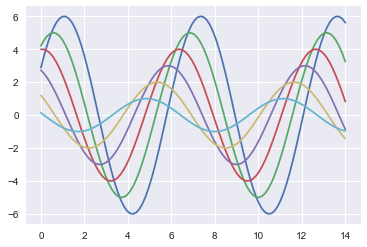

In [5]:
sinplot()

### Backgrounds

**White Grid**

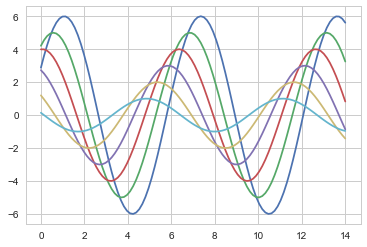

In [6]:
sns.set_style("whitegrid")
sinplot()

**Dark Grid**

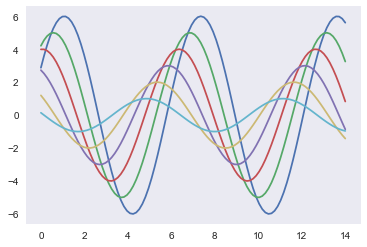

In [7]:
sns.set_style("dark")
sinplot()

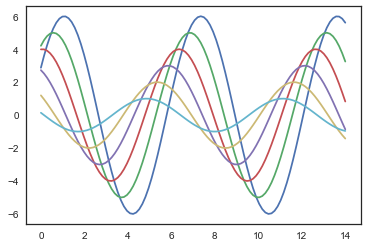

In [8]:
sns.set_style("white")
sinplot()

_Try "White"_

**Adding ticks to the axes**

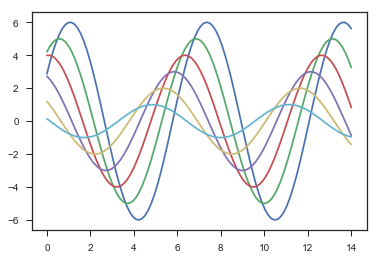

In [9]:
sns.set_style("ticks")
sinplot()

**Temporary Style**

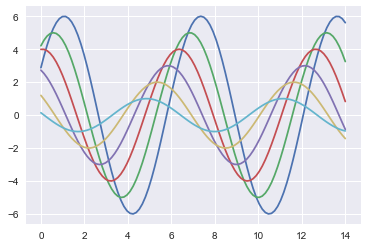

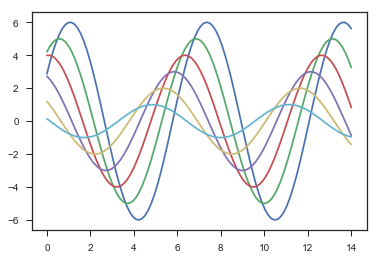

In [10]:
with sns.axes_style("darkgrid"):
    sinplot()
plt.figure()
sinplot()

### Scaling

**Figure Size**

Figure(720x288) AxesSubplot(0.125,0.125;0.775x0.755)


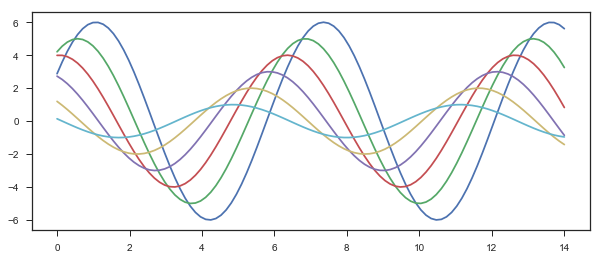

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
print(fig,ax)
sinplot()

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

The four preset contexts, in order of relative size, are `paper`, `notebook`, `talk`, and `poster`. The `notebook` style is the default, and was used in the plots above.

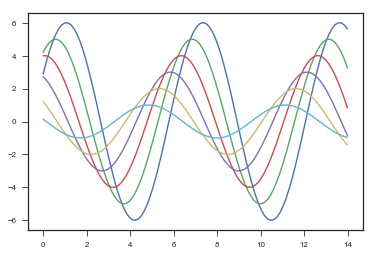

In [12]:
sns.set_context("paper")
sinplot()

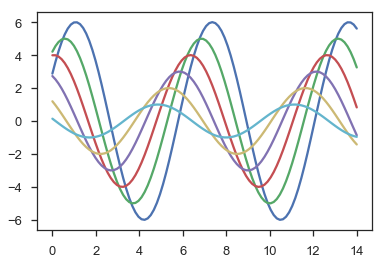

In [13]:
sns.set_context("talk")
sinplot()

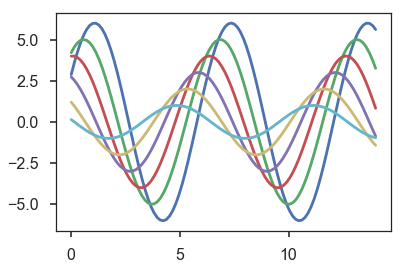

In [14]:
sns.set_context("poster")
sinplot()

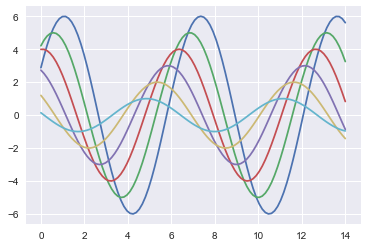

In [15]:
sns.set()
sinplot()

### Labels & Title

**Labels**

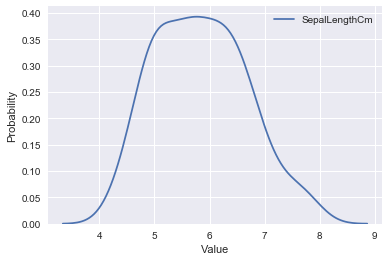

In [16]:
ax = sns.kdeplot(df['SepalLengthCm'])
ax.set(xlabel='Value', ylabel='Probability');

**Title**

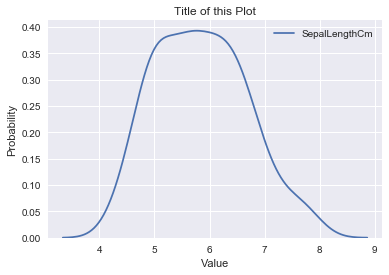

In [17]:
ax = sns.kdeplot(df['SepalLengthCm'])
ax.set_title('Title of this Plot');
ax.set(xlabel='Value', ylabel='Probability');

### Grids

**Using Matplotlib**

Subplots can be created explicitly on a figure using `subplots(rows, columns, sharex=bool, sharey=bool)`, all at once. It returns a figure and an array of axes of order rows x columns. This array can be used to plot on a specific subplot.

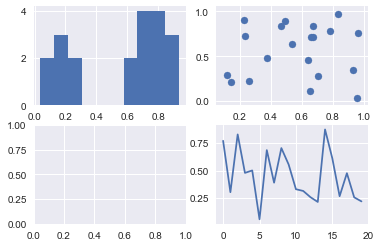

In [18]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(np.random.rand(20));
ax[0,1].scatter(np.random.rand(20), np.random.rand(20));
ax[1,1].plot(np.random.rand(20));

## Distribution of Data

### Univariate

**Histogram & KDE (Kernel Density Estimate)**

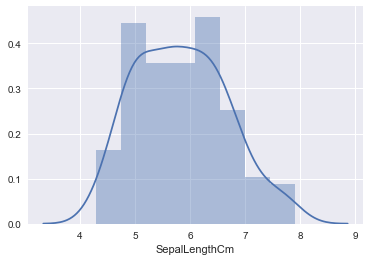

In [19]:
sns.distplot(df['SepalLengthCm']);

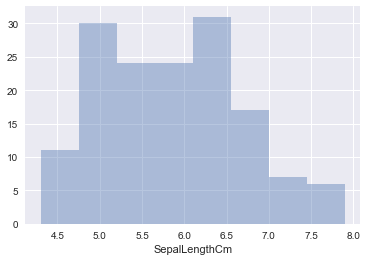

In [20]:
sns.distplot(df['SepalLengthCm'], kde=False);

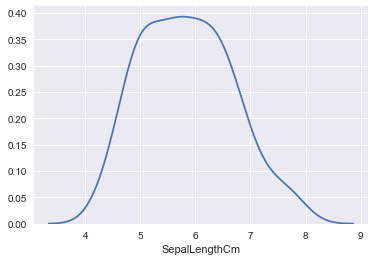

In [21]:
sns.distplot(df['SepalLengthCm'], hist=False);

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

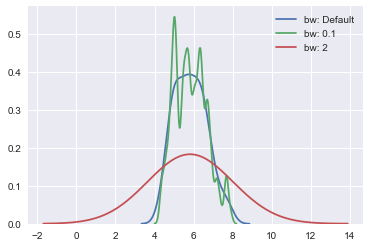

In [22]:
sns.kdeplot(df['SepalLengthCm'], label="bw: Default")
sns.kdeplot(df['SepalLengthCm'], bw=.1, label="bw: 0.1")
sns.kdeplot(df['SepalLengthCm'], bw=2, label="bw: 2")
plt.legend();

**Histogram with rugplot**

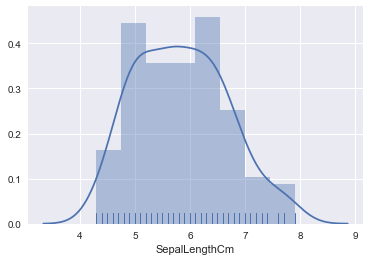

In [23]:
sns.distplot(df['SepalLengthCm'], rug=True);

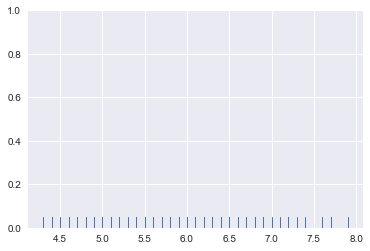

In [24]:
sns.rugplot(df['SepalLengthCm']);

### Bivariate

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the `jointplot()` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

**Scatterplots ( ~ rugplots in 2D )**

`Jointplot()` (Joint distribution plots) defaults to a scatterplot.

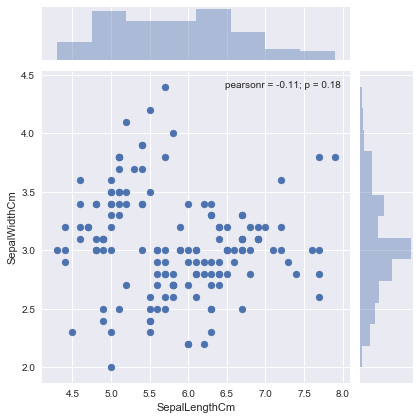

In [25]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df);

___Magic___

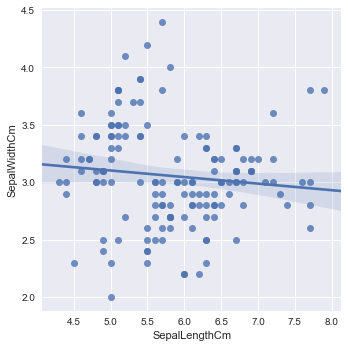

In [26]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df);

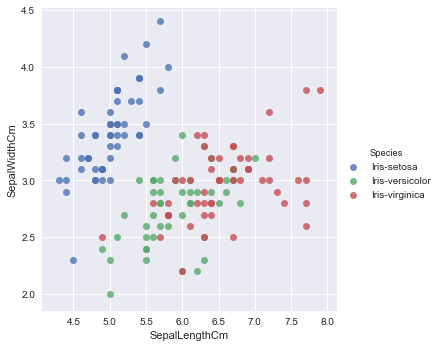

In [27]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, fit_reg=False, hue='Species');

In [28]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Contours ( ~ KDE in 2D )**

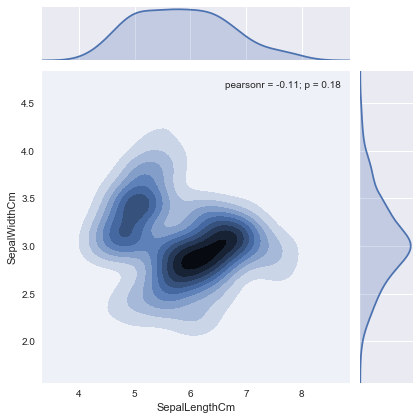

In [29]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, kind="kde");

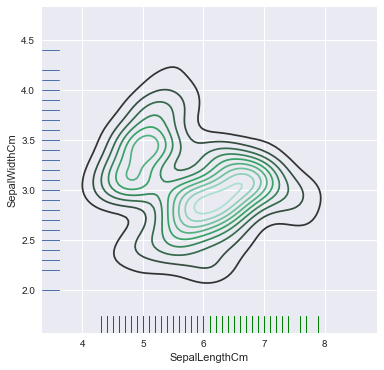

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.SepalLengthCm, df.SepalWidthCm, ax=ax)
sns.rugplot(df.SepalLengthCm, color="g", ax=ax)
sns.rugplot(df.SepalWidthCm, vertical=True, ax=ax);

### Pairwise Bivariate

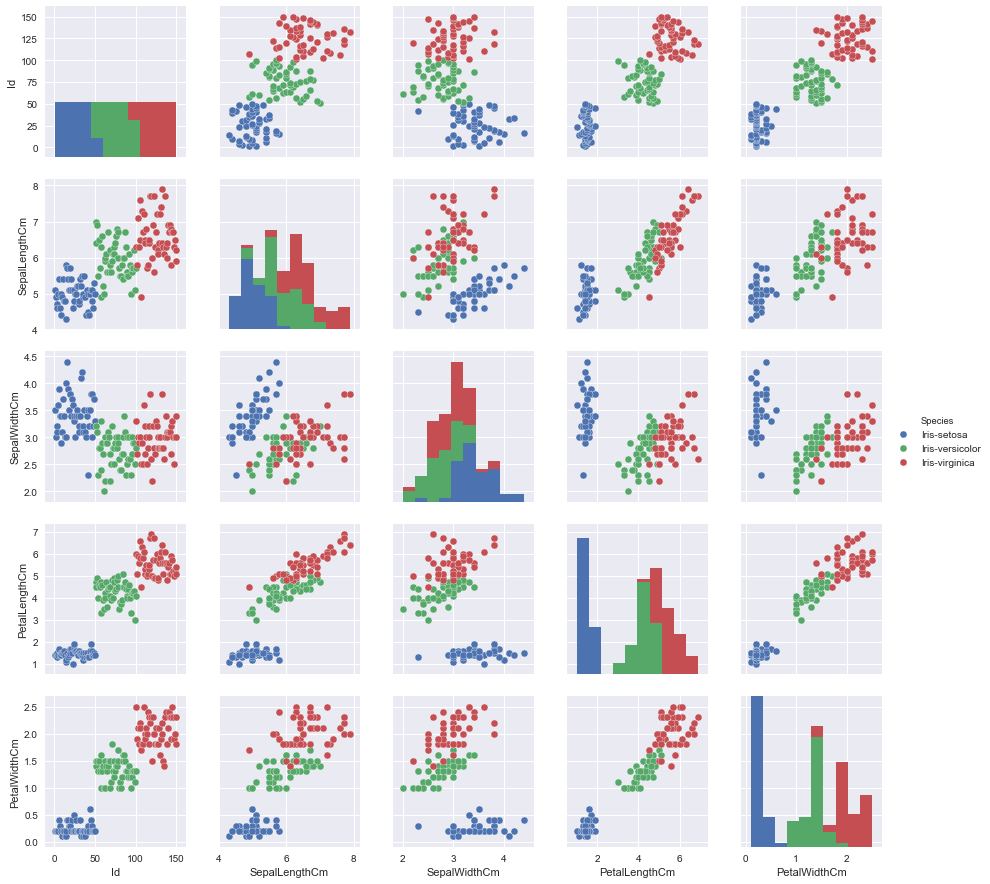

In [31]:
sns.pairplot(df, hue='Species');

### Boxplots

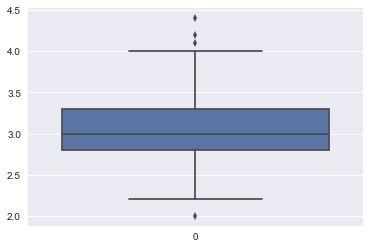

In [32]:
sns.boxplot(data=df['SepalWidthCm']);

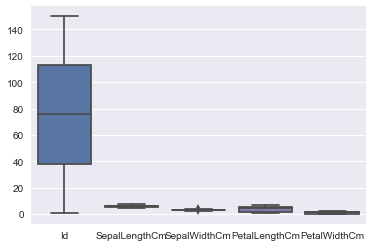

In [33]:
sns.boxplot(data=df);

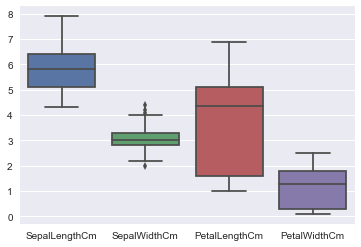

In [34]:
sns.boxplot(data=df.drop('Id', axis=1));

## Categorical Data

### Swarm Plots

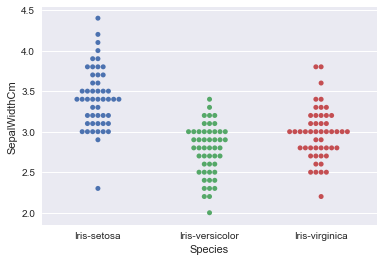

In [35]:
sns.swarmplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm');

### Box plots

TypeError: cannot perform reduce with flexible type

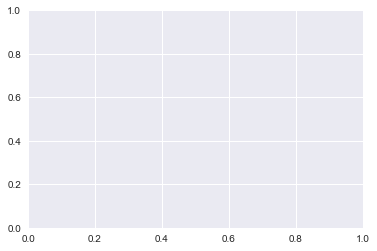

In [48]:
sns.boxplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm');

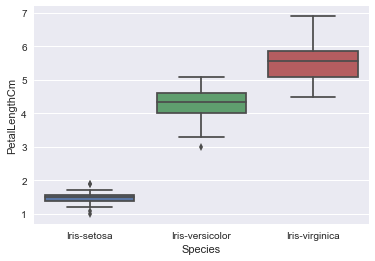

In [37]:
sns.boxplot(data=df.drop('Id', axis=1), x='Species', y='PetalLengthCm');

### Voilin Plots

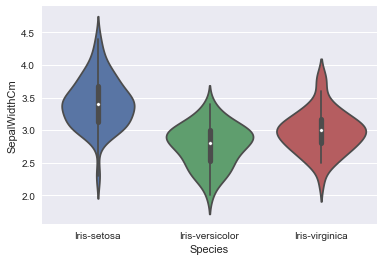

In [38]:
sns.violinplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm');

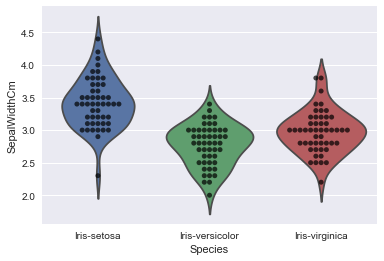

In [39]:
sns.violinplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm', inner=None);
sns.swarmplot(data=df.drop('Id', axis=1), x='Species', y='SepalWidthCm', alpha=0.7, color='k');

### Bar Plots

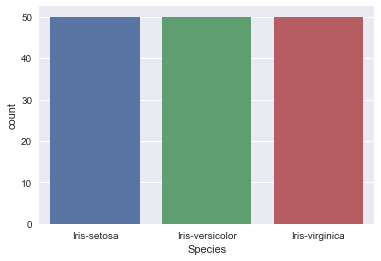

In [40]:
sns.countplot(x='Species', data=df);

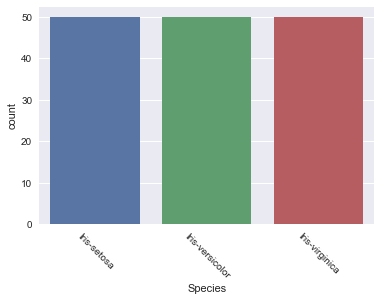

In [41]:
sns.countplot(x='Species', data=df);
plt.xticks(rotation=-45);

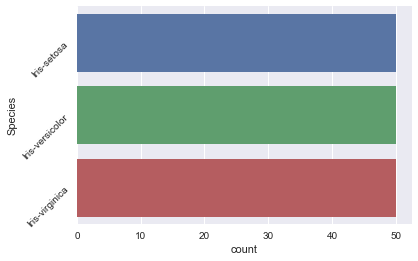

In [42]:
sns.countplot(y='Species', data=df);
plt.yticks(rotation=45);

### Factor Plots

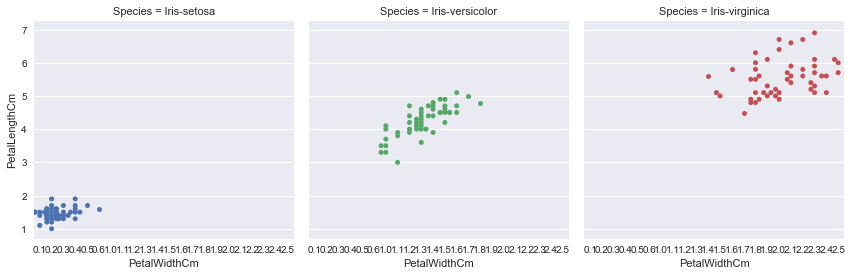

In [43]:
g = sns.factorplot(x='PetalWidthCm', y='PetalLengthCm', data=df, hue ='Species', col='Species', kind='swarm');

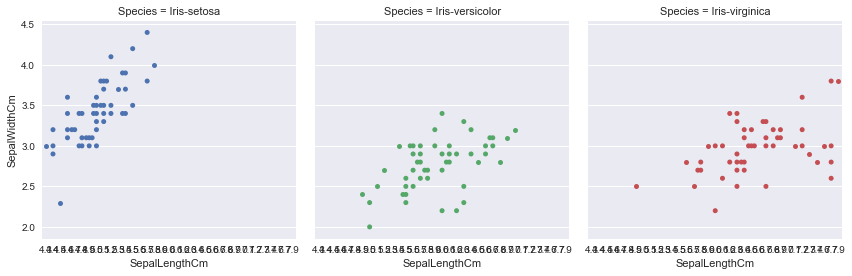

In [44]:
g = sns.factorplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue ='Species', col='Species', kind='swarm');

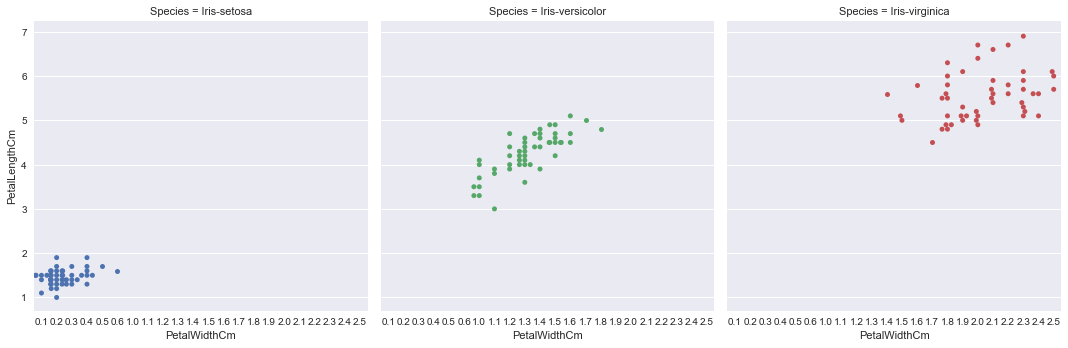

In [45]:
g = sns.factorplot(x='PetalWidthCm', y='PetalLengthCm', data=df, hue ='Species', col='Species', kind='swarm', size=5);

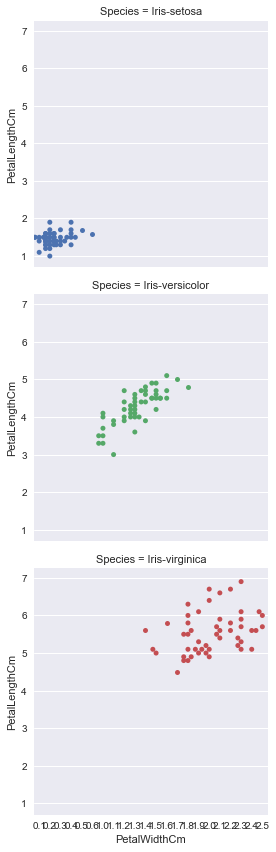

In [46]:
g = sns.factorplot(x='PetalWidthCm', y='PetalLengthCm', data=df, hue='Species', row='Species', kind='swarm');

### Heatmap

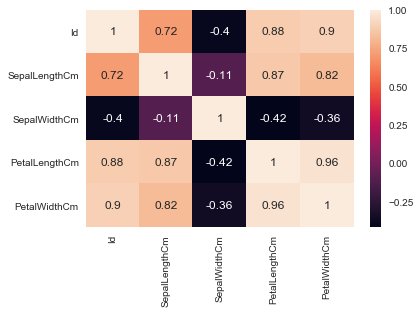

In [47]:
cor = df.corr()
sns.heatmap(cor, annot=True);